In [1]:
# standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# additional imports
from netCDF4 import Dataset

In [2]:
#noIA_nc = Dataset('noIA_3lvl.nc')
redIAsundaGL_nc = Dataset('redIAsundaGL_3lvl.nc')
redIAsunda10GL_nc = Dataset('redIAsunda10GL_3lvl.nc')
redIAsunda5GL_nc = Dataset('redIAsunda5GL_3lvl.nc')
control_nc = Dataset('control_3lvl.nc')

control_nc.variables.keys()

dict_keys(['lon', 'lat', 'lith', 'runs', 'atm_CO2_level', 'volcanic_degassing', 'weathering'])

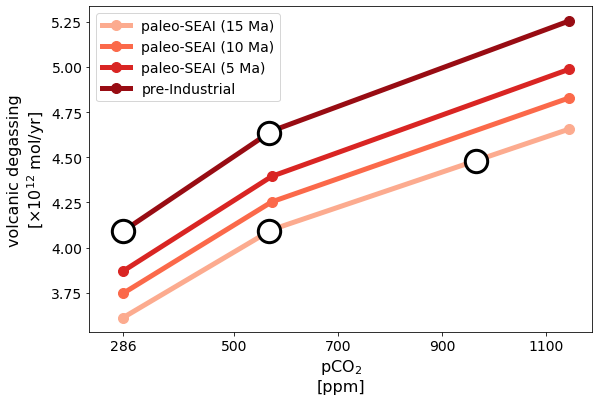

In [3]:
nc_list = [redIAsundaGL_nc, redIAsunda10GL_nc, redIAsunda5GL_nc, control_nc]
label_list = ['paleo-SEAI (15 Ma)', 'paleo-SEAI (10 Ma)', 'paleo-SEAI (5 Ma)', 'pre-Industrial']

cmap = matplotlib.cm.get_cmap('Reds')
cmap_inds = np.linspace(0.3,0.9,len(nc_list))

fig, ax = plt.subplots(figsize=(9,6))

for i in range(len(nc_list)):
    ax.plot(nc_list[i].variables['atm_CO2_level'][:].data,
            nc_list[i].variables['volcanic_degassing'][:].data/1e12,
            'o-', c=cmap(cmap_inds[i]), label=label_list[i], linewidth=5, markersize=10)  
    
ax.legend(fontsize=14)
ax.set_ylabel('volcanic degassing\n[$\\times$10$^{12}$ mol/yr]', fontsize=16)
ax.set_xlabel('pCO$_{2}$\n[ppm]', fontsize=16)

# plot some markers
pCO2_interp = np.interp(control_nc.variables['volcanic_degassing'][0].data/1e12,
                        redIAsundaGL_nc.variables['volcanic_degassing'][:].data/1e12,
                        redIAsundaGL_nc.variables['atm_CO2_level'][:].data)

ax.scatter(pCO2_interp,
           control_nc.variables['volcanic_degassing'][0].data/1e12,
           s=500, zorder=99, facecolor='white', edgecolor='k', linewidth=3)

degassing_interp = np.interp(pCO2_interp,
                             control_nc.variables['atm_CO2_level'][:].data,
                             control_nc.variables['volcanic_degassing'][:].data/1e12)

ax.scatter(pCO2_interp,
           degassing_interp,
           s=500, zorder=99, facecolor='white', edgecolor='k', linewidth=3)

ax.scatter(control_nc.variables['atm_CO2_level'][0].data,
           control_nc.variables['volcanic_degassing'][0].data/1e12,
           s=500, zorder=99, facecolor='white', edgecolor='k', linewidth=3)

# plot some degassing estimates
VDM2014_degassing_ratio = np.interp(15, [8,24], [1,1.218])
VDM2014_degassing = (control_nc.variables['volcanic_degassing'][0].data/1e12)*VDM2014_degassing_ratio
C2006_degassing_ratio = 20.6/27.0

CDM2014_pCO2_interp = np.interp(VDM2014_degassing,
                                redIAsundaGL_nc.variables['volcanic_degassing'][:].data/1e12,
                                redIAsundaGL_nc.variables['atm_CO2_level'][:].data)

ax.scatter(CDM2014_pCO2_interp,
           VDM2014_degassing,
           s=500, zorder=99, facecolor='white', edgecolor='k', linewidth=3)

ax.set_xticks([286, 500, 700, 900, 1100])

ax.tick_params(axis='both', labelsize=14)

#plt.savefig('../../../Manuscript/Figures/weatherability_curves_raw.pdf', bbox_inches='tight')
plt.show(fig)

In [4]:
print('present day degassing = {:.2f} e12 mol/yr'.format(control_nc.variables['volcanic_degassing'][0].data/1e12))
print('15 Ma degassing       = {:.2f} e12 mol/yr'.format(degassing_interp))
print('ratio                 = {:.2f}'.format(degassing_interp/\
                                              (control_nc.variables['volcanic_degassing'][0].data/1e12)))

present day degassing = 4.09 e12 mol/yr
15 Ma degassing       = 4.64 e12 mol/yr
ratio                 = 1.13


In [5]:
print('15 Ma pCO2 = {:.2f} ppm'.format(pCO2_interp))

15 Ma pCO2 = 567.50 ppm


In [6]:
print('15 Ma pCO2 = {:.2f} ppm'.format(CDM2014_pCO2_interp))

15 Ma pCO2 = 965.48 ppm
